## Your task is to find a linear approximation of the function sqrt(1 + x), x belongs to  [0; 1]. 
#### Your homework should contain the following steps:

### a) Generate N = 10,000 random numbers from [0; 1]: x1; x2; ... ; xN belong to [0; 1] ; and then obtain their labels: yi = sqrt(1 + xi), i = 1; 2; ... ;N.

In [1]:
# Import necessary libraries

import random
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
# 1. Get here the xi_s: 10,000 random numbers from [0,1]
xi = np.random.rand(10000, 1)

# 2. Find yi_s by giving the values of xi_s:
yi = np.sqrt(1+xi)

In [3]:
print(min(xi), max(xi))
print(xi)
print(yi)

[2.48405082e-05] [0.99984876]
[[0.71975803]
 [0.20394347]
 [0.5100841 ]
 ...
 [0.5327756 ]
 [0.25913116]
 [0.53361408]]
[[1.31139545]
 [1.09724358]
 [1.22885479]
 ...
 [1.23805315]
 [1.12211014]
 [1.23839173]]


In [4]:
# Train, test and validation sets split

train_ratio = 0.60
validation_ratio = 0.20
test_ratio = 0.20

x_train, x_test, y_train, y_test = train_test_split(xi, yi, test_size=1 - train_ratio)

x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

print(x_train)

[[0.36486437]
 [0.92666005]
 [0.41356726]
 ...
 [0.24279077]
 [0.38964905]
 [0.30140785]]


### b) Do linear regression on your generated data using Stochastic Gradient Descent (implement yourself).

In [5]:
X_df = pd.DataFrame(x_train)
y_df = pd.DataFrame(y_train)

## Length, or number of observations, in our data
m = len(y_df)

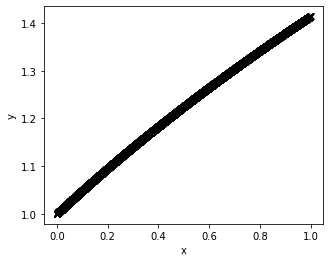

In [6]:
plt.figure(figsize=(5,4))
plt.plot(X_df, y_df, 'kx')
plt.xlabel('x')
plt.ylabel('y');

In [7]:
## Add a columns of 1s as intercept to X
X_df['Intercept'] = 1

## Transform to Numpy arrays for easier matrix math and start w at 0
X = np.array(X_df)
y = np.array(y_df).flatten()
w = np.array([0, 0])

In [8]:
X

array([[0.36486437, 1.        ],
       [0.92666005, 1.        ],
       [0.41356726, 1.        ],
       ...,
       [0.24279077, 1.        ],
       [0.38964905, 1.        ],
       [0.30140785, 1.        ]])

In [9]:
x_train

array([[0.36486437],
       [0.92666005],
       [0.41356726],
       ...,
       [0.24279077],
       [0.38964905],
       [0.30140785]])

In [10]:
iterations = 1000
alpha = 0.01

SGD algorithm is the following:

1. Choose an initial vector of parameters w and learning rate alpha
2. Repeat until an approximate minimum is obtained:
       2.2 Everytime before starting, we need to shuffle the data 
       2.3 Then update our w.

In [11]:
# Let's define the function for calculating loss 

def grad_loss(X, y, w):
    
    y_pred = np.dot(X, w)
    error = y_pred - y
    loss_gradient = (np.dot(X.T, error))/(len(X))
    
    return loss_gradient

In [12]:
# We need to follow the algorithm: shuffle the data, continue the loop until minimum is obtained:

def _iter(X, y, batch_size: int=1):
    
    n_observations = X.shape[0]
    idx = list(range(n_observations))
    random.shuffle(idx)
    
    for batch_id, i in enumerate(range(0, n_observations, batch_size)):
        _pos = np.array(idx[i: min(i + batch_size, n_observations)])
        yield batch_id, X.take(_pos, axis=0), y.take(_pos)

In [13]:
def SGD(X, y, learning_rate, n_epochs, batch_size=1):
    mse_log = []
    w_log = []
    total_loss_log = []
    np.random.seed(444)
    w = np.random.rand(len(X[0]))
    
    for i in range(n_epochs+1):
        total_error = 0
        
        for batch_id, data, label in _iter(X, y, batch_size):
            grad_loss_= grad_loss(data, label, w)
            w = w - learning_rate * grad_loss_

        y_pred = np.dot(X, w)
        _mse = mean_squared_error(y, y_pred)
        mse_log.append(_mse)
        w_log.append(w)
        if i % 100 == 0:
            print(f'Epoch: {i} | MSE: {_mse}')

    return w, w_log, mse_log

In [14]:
w, _, mse_ = SGD(X, y, learning_rate=alpha, n_epochs=iterations, batch_size=1)

Epoch: 0 | MSE: 3.3073970268398734e-05
Epoch: 100 | MSE: 2.7396199920189114e-05
Epoch: 200 | MSE: 2.746707469122632e-05
Epoch: 300 | MSE: 2.757029130681781e-05
Epoch: 400 | MSE: 2.7450599250456064e-05
Epoch: 500 | MSE: 2.7389203619276464e-05
Epoch: 600 | MSE: 2.7389507020022536e-05
Epoch: 700 | MSE: 2.7388363028293478e-05
Epoch: 800 | MSE: 2.763738067456997e-05
Epoch: 900 | MSE: 2.8094566867143702e-05
Epoch: 1000 | MSE: 2.74923613072382e-05


In [15]:
w

array([0.41162827, 1.01280462])

### c) Do linear regression on your generated data using Mini-Batch Gradient Descent (implement yourself).

Choose an initial vector of parametrs w, learning rate alpha, and batch size B:
So we can just change the B - the number of batches in the previous case (SGD) and the rest is the same logic.
In case of B batches we will take 100 to 100 of losses untill the minimum is obtained.
For this case I took 60 (training dataset consists of 6000 datapoints).

In [16]:
w_mini, _mini, mse_mini = SGD(X, y, learning_rate=alpha, n_epochs=iterations, batch_size=60)

Epoch: 0 | MSE: 0.01272952943348829
Epoch: 100 | MSE: 2.740172586496152e-05
Epoch: 200 | MSE: 2.7377826822790514e-05
Epoch: 300 | MSE: 2.7378014650229886e-05
Epoch: 400 | MSE: 2.7377926665640762e-05
Epoch: 500 | MSE: 2.7377731605729742e-05
Epoch: 600 | MSE: 2.737777173511595e-05
Epoch: 700 | MSE: 2.737954271647911e-05
Epoch: 800 | MSE: 2.737887890632044e-05
Epoch: 900 | MSE: 2.7377692373947826e-05
Epoch: 1000 | MSE: 2.737784881249861e-05


In [17]:
w_mini

array([0.41191908, 1.01300049])

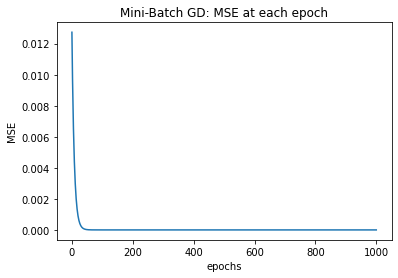

In [18]:
#Plot the mse function for Mini-Batch Gradient Descent
plt.title('Mini-Batch GD: MSE at each epoch')
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.plot(mse_mini)
plt.show()

### e) Sketch the graphs of all approximations on one graph.

In [19]:
# Results of each model

First_SGD = np.dot(X,w)
First_SGD

Second_MBGD = np.dot(X,w_mini)
Second_MBGD

array([1.16329508, 1.39470945, 1.18335673, ..., 1.11301064, 1.17350437,
       1.13715613])

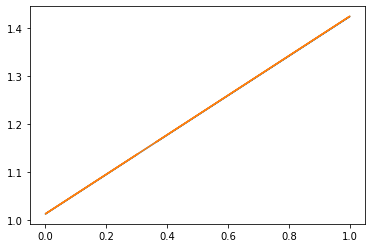

In [20]:
plt.plot(x_train, First_SGD)
plt.plot(x_train, Second_MBGD);

These two lines(green and orange lines) intersect in all points, it's because the w's are almost the same.
Let's see what will happen in case of Taylor approximation.

### f) Compare all solutions with the First degree Taylor approximation of the function sqrt(1 + x).

The first degree Taylor approximation is equal to y = 1 + (1/2)*x

In [21]:
# 1. Get here the xi_s: 10,000 random numbers from [0,1]
Taylor_xi = np.random.rand(10000, 1)

# 2. Find yi_s by giving the values of xi_s:
Taylor_yi = 1 + (1/2) * Taylor_xi

In [22]:
print(min(Taylor_xi), max(Taylor_xi))
print(Taylor_xi)
print(Taylor_yi)

[1.38912807e-05] [0.99986935]
[[0.64220716]
 [0.66722262]
 [0.03913991]
 ...
 [0.10072202]
 [0.32905181]
 [0.07839173]]
[[1.32110358]
 [1.33361131]
 [1.01956995]
 ...
 [1.05036101]
 [1.16452591]
 [1.03919586]]


In [23]:
# Train, test and validation sets split

train_ratio = 0.60
validation_ratio = 0.20
test_ratio = 0.20

Taylor_x_train, Taylor_x_test, Taylor_y_train, Taylor_y_test = train_test_split(Taylor_xi, 
                                                                                Taylor_yi, test_size=1 - train_ratio)

Taylor_x_val, Taylor_x_test, Taylor_y_val, Taylor_y_test = train_test_split(
    Taylor_x_test, Taylor_y_test, test_size = test_ratio/(test_ratio + validation_ratio)) 

print(Taylor_x_train)

[[0.43421188]
 [0.46702402]
 [0.94936443]
 ...
 [0.15044597]
 [0.3354385 ]
 [0.53720321]]


### Taylor's b)

In [24]:
Taylor_X_df = pd.DataFrame(Taylor_x_train)
Taylor_y_df = pd.DataFrame(Taylor_y_train)

## Length, or number of observations, in our data
m = len(Taylor_y_df)

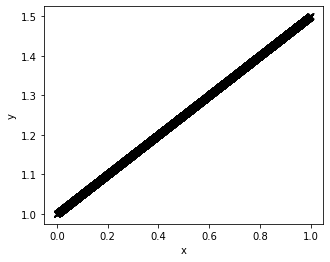

In [25]:
plt.figure(figsize=(5,4))
plt.plot(Taylor_X_df, Taylor_y_df, 'kx')
plt.xlabel('x')
plt.ylabel('y');

In [26]:
## Add a columns of 1s as intercept to X
Taylor_X_df['Intercept'] = 1

## Transform to Numpy arrays for easier matrix math and start w at 0
Taylor_X = np.array(Taylor_X_df)
Taylor_y = np.array(Taylor_y_df).flatten()
w = np.array([0, 0])

In [27]:
iterations = 1000
alpha = 0.01

In [28]:
Taylor_w, Taylor__, Taylor_mse_ = SGD(Taylor_X, Taylor_y, learning_rate=alpha, n_epochs=iterations, batch_size=1)

Epoch: 0 | MSE: 3.460874153269746e-06
Epoch: 100 | MSE: 1.013907308608484e-29
Epoch: 200 | MSE: 1.013907308608484e-29
Epoch: 300 | MSE: 1.013907308608484e-29
Epoch: 400 | MSE: 1.013907308608484e-29
Epoch: 500 | MSE: 1.013907308608484e-29
Epoch: 600 | MSE: 1.013907308608484e-29
Epoch: 700 | MSE: 1.013907308608484e-29
Epoch: 800 | MSE: 1.013907308608484e-29
Epoch: 900 | MSE: 1.013907308608484e-29
Epoch: 1000 | MSE: 1.013907308608484e-29


In [29]:
Taylor_w

array([0.5, 1. ])

### Taylor's c)

In [30]:
Taylor_w_mini, Taylor__mini, Taylor_mse_mini = SGD(Taylor_X, Taylor_y, learning_rate=alpha, 
                                                   n_epochs=iterations, batch_size=60)

Epoch: 0 | MSE: 0.008555655214890238
Epoch: 100 | MSE: 1.4452105807165038e-08
Epoch: 200 | MSE: 2.441291900230155e-14
Epoch: 300 | MSE: 4.1240553261161957e-20
Epoch: 400 | MSE: 6.956400219393271e-26
Epoch: 500 | MSE: 1.7380761961826495e-28
Epoch: 600 | MSE: 1.4228435984978288e-28
Epoch: 700 | MSE: 1.2885203078613212e-28
Epoch: 800 | MSE: 1.24704027583157e-28
Epoch: 900 | MSE: 1.2146058488483534e-28
Epoch: 1000 | MSE: 1.2038480869454457e-28


In [31]:
Taylor_w_mini

array([0.5, 1. ])

### Taylor's e)

In [32]:
# Results of each model

Taylor_First_SGD = np.dot(Taylor_X,Taylor_w)
Taylor_First_SGD

Taylor_Second_MBGD = np.dot(Taylor_X,Taylor_w_mini)
Taylor_Second_MBGD

array([1.21710594, 1.23351201, 1.47468221, ..., 1.07522298, 1.16771925,
       1.26860161])

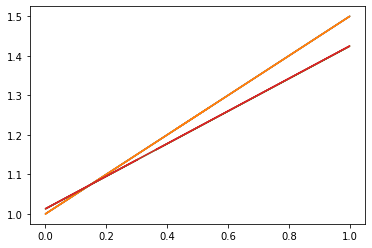

In [36]:
plt.plot(Taylor_x_train, Taylor_First_SGD)
plt.plot(Taylor_x_train, Taylor_Second_MBGD)
plt.plot(x_train, First_SGD)
plt.plot(x_train, Second_MBGD);

The Orange line is the Taylor's approximation for both SGD and mini-batch GD, the red line is for the previous case, where the function was the initial one, i.e. sqrt(1+x)

So, let's see the results.
In case of sqrt(1+x) function approximation we performed linear regression using 2 models: 

1. Stochastic Gradient Descent (SGD), 
2. Mini-Batch Gradient Descent

For the 1. and 2. we got almost the same w0 and w1 weights: (SGD case) w0 = 1.01280462, w1 = 0.41162827 (this is for mini-batch GD case: w0 = 1.01300049, w1 = 0.41191908), which are much closer to the results of the 1st HW in case of doing Linear Regression by using the methods Closed form solution and "sklear" library. 

As we know that the First degree Taylor's approximation of the function sqrt(1+x) = 1 + (1/2)*x.
Let's see what we have in case of this approximation:

For 1. and 2. cases the w0 and w1 are w0 = 1. , w1 = 0.5. For both of them the results are the same but the performance in Mini-Batch GD is better than in SGD. It's because of the fact that by adding batches (for this case it's 60) our model starts to converge to the minimum point faster than in case of SGD. And as you can see the results are the same.

In case of 1. and 2. for the sqrt(1+x) function we don't get the 0.5 for the slope weight, but we can say that it's almost closser to the 0.5 (SGD and MBGD's outputs are different starting from the 3th number).